## Main Script

In [1]:
# Import some libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress



################ Functions ################

# Function dedicated for extracting ratings from the messy data
def get_rating(s):
    extracted = re.search(r'(\d+(\.\d+)?)/10', s)
    
    if extracted:
        extracted = re.sub('/10', '', extracted.group(0))
        return extracted
    return None


# Function to convert string to datetime object
def get_dates(d):
    return(datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))    


# Function to convert string to timestamp
def to_timestamp(d):
    return(datetime.timestamp(d))


# Function to predict using the linear model created
def predict_ratings(timestamp):
    return(timestamp * fit.slope + fit.intercept)

###########################################


################ Main Script ################

# Read in the data from the designated csv file
data_tweets = pd.read_csv('dog_rates_tweets.csv')

# Extract the rating out of the tweet
data_tweets['rating'] = data_tweets['text'].apply(get_rating)
data_tweets = data_tweets[data_tweets['rating'].notna()]
data_tweets['rating'] = pd.to_numeric(data_tweets['rating'])

# Get rid of outliers 
data_tweets = data_tweets[data_tweets['rating'] < 25]

# Convert the data clumn to a datetime object
data_tweets['created_at'] = data_tweets['created_at'].apply(get_dates)

# Create a timestamp column
data_tweets['timestamp'] = data_tweets['created_at'].apply(to_timestamp)

# Get the line of best fit
fit = linregress(data_tweets['timestamp'], data_tweets['rating'])

# Predict values using linear model
data_tweets['Prediction'] = data_tweets['timestamp'].apply(predict_ratings)

## Results

In [2]:
# Data
data_tweets

,id,created_at,text,rating,timestamp,Prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,12.624948
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,12.622347
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,12.620925
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,12.613084
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,12.610593
...,...,...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0,1.550219e+09,13.183074
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0,1.550106e+09,13.180479
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0,1.549607e+09,13.169008
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0,1.549607e+09,13.169008


In [3]:
# LOBF Slope + Intercept
fit.slope, fit.intercept

(2.2983110319298572e-08, -22.445783429572735)

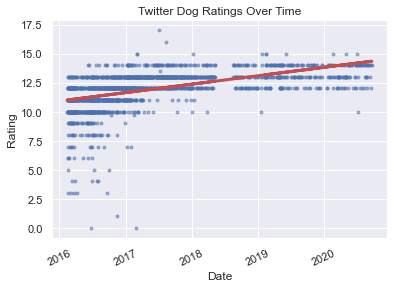

In [4]:
import seaborn

seaborn.set()

# Plot the raw ratings data + linear model
plt.plot(data_tweets['created_at'], data_tweets['rating'], 'b.', alpha = 0.5)
plt.plot(data_tweets['created_at'], data_tweets['Prediction'], 'r-', linewidth = 3)
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Twitter Dog Ratings Over Time')
plt.xticks(rotation=25)

plt.show()

# Save the plot?
# plt.savefig('dog-rates.png')

## Excercise 7 Output

In [5]:
# p-value of slope (Yes it is different from 0)
print(fit.pvalue)

3.7900809673304165e-121


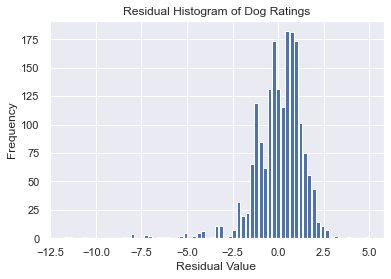

In [6]:
# Calculate the residuals
residuals = data_tweets['rating'] - data_tweets['Prediction'] 

# Plot the residuals
plt.hist(x = residuals, bins = 'auto', rwidth = 0.85)
plt.title('Residual Histogram of Dog Ratings')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.show()

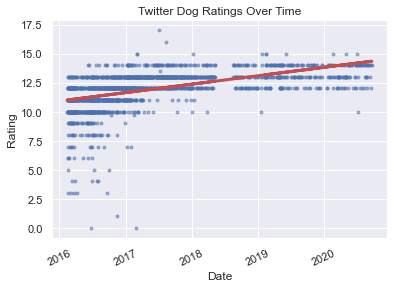

<Figure size 432x288 with 0 Axes>

In [7]:
import seaborn

seaborn.set()

# Plot the raw ratings data + linear model
plt.plot(data_tweets['created_at'], data_tweets['rating'], 'b.', alpha = 0.5)
plt.plot(data_tweets['created_at'], data_tweets['Prediction'], 'r-', linewidth = 3)
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Twitter Dog Ratings Over Time')
plt.xticks(rotation=25)

plt.show()

# Save the plot?
plt.savefig('plot_lob.png')

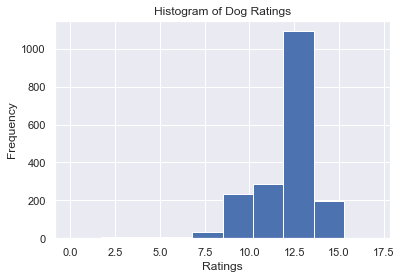

In [8]:
seaborn.set()

plt.hist(x = data_tweets['rating'])
plt.title('Histogram of Dog Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.show()

In [9]:
data_tweets['year'] = pd.DatetimeIndex(data_tweets['created_at']).year

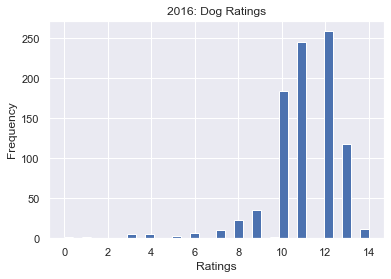

In [19]:
seaborn.set()

data = data_tweets[data_tweets['year'] == 2016]
plt.hist(x = data['rating'], bins='auto')
plt.title('2016: Dog Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.show()



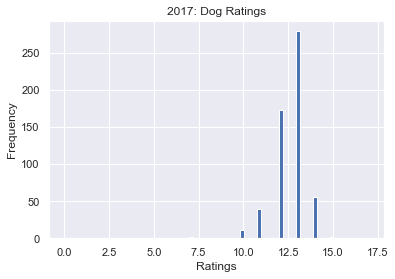

In [20]:
data = data_tweets[data_tweets['year'] == 2017]
plt.hist(x = data['rating'], bins='auto')
plt.title('2017: Dog Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.show()

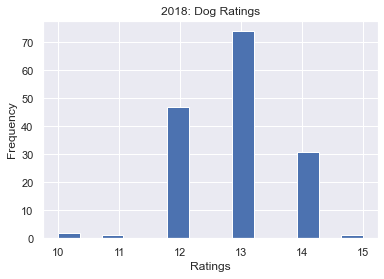

In [21]:
data = data_tweets[data_tweets['year'] == 2018]
plt.hist(x = data['rating'], bins='auto')
plt.title('2018: Dog Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.show()

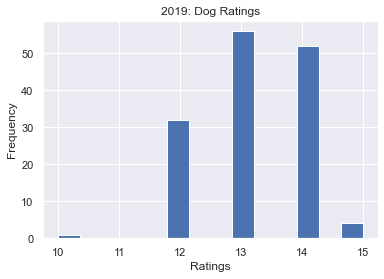

In [22]:
data = data_tweets[data_tweets['year'] == 2019]
plt.hist(x = data['rating'], bins='auto')
plt.title('2019: Dog Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.show()

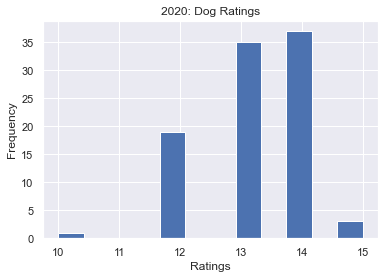

In [23]:
data = data_tweets[data_tweets['year'] == 2020]
plt.hist(x = data['rating'], bins='auto')
plt.title('2020: Dog Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.show()

In [26]:
data_tweets['text'].str.lower().str.split()

2        [this, is, louie., he, has, misplaced, his, ch...
7        [this, is, manny., he, hasn’t, seen, your, cro...
8        [this, is, libby., she, leap., 14/10, (ig:, li...
24       [this, is, rosie., she, thought, coachella, wa...
30       [this, is, riley., he’ll, be, your, chauffeur,...
                               ...                        
11631    [honorary, 15/10, for, oppy,, the, very, good,...
11638    [this, is, george., he, doesn’t, chew, socks.,...
11665                 [@panthers, @proud_kcs, 13/10, easy]
11666    [rt, @geekandsundry:, .@dog_rates, announces, ...
11672    [this, is, missy., these, are, her, best, angl...
Name: text, Length: 1871, dtype: object

In [34]:
from collections import Counter, OrderedDict
results = Counter()
data_tweets['text'].str.lower().str.split().apply(results.update)
OrderedDict(results.most_common())

OrderedDict([('is', 1456),
             ('this', 1383),
             ('a', 950),
             ('to', 666),
             ('he', 621),
             ('the', 606),
             ('13/10', 529),
             ('12/10', 506),
             ('would', 442),
             ("he's", 355),
             ('his', 332),
             ('for', 301),
             ('she', 287),
             ('11/10', 283),
             ('you', 260),
             ('of', 253),
             ('in', 252),
             ('and', 246),
             ('rt', 226),
             ('@dog_rates:', 188),
             ('10/10', 186),
             ('her', 178),
             ('just', 173),
             ('with', 167),
             ('14/10', 163),
             ('af', 156),
             ('be', 148),
             ('but', 145),
             ('on', 144),
             ('was', 142),
             ('meet', 136),
             ('good', 132),
             ('not', 130),
             ('h*ckin', 129),
             ('very', 129),
             ('it', 125),
        

In [ ]:

# cooper 14
# charlie 13
# oliver 12
# george 11
# lucy 11

In [40]:
len(data_tweets[data_tweets['rating'] > 10].reset_index())

1577